<a href="https://colab.research.google.com/github/nithilan17/AI_Poker_Game/blob/main/sas_superbowl_preview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://scontent-ord5-1.xx.fbcdn.net/v/t39.30808-6/475345348_29240568715541891_3925048248173687890_n.jpg?stp=cp6_dst-jpg_tt6&_nc_cat=101&ccb=1-7&_nc_sid=aa7b47&_nc_ohc=8q200indR3QQ7kNvgFtrJ9d&_nc_zt=23&_nc_ht=scontent-ord5-1.xx&_nc_gid=Apx1y4KAf5E5Cxts3TLPqJ8&oh=00_AYBX3My6bO9or4mqXbTUmfCVTDpRhkBKQdekwyUQuVoWww&oe=67A30162"  width="300" height="300">

### **Sports Analytics Society Workshop: Super Bowl Preview**
 2/4/2025


Current lines on [DraftKings](https://sportsbook.fanduel.com/navigation/nfl) (as of 2/3/2025)

Spread: KC -1.5, PHI +1.5

Total: O/U 48.5

Mahomes: O/U 250.5 pass yds

Hurts: O/U 211.5 pass yds

Kelce: O/U 60.5 rec yds

AJ Brown: O/U 70.5 rec yds

Barkley: O/U 110.5 rush yds

Hunt: O/U 43.5 rush yds

### Install Dependencies

In [ ]:
!pip install pandas
!pip install numpy
!pip install scikit-learn

### Data Cleaning

[Dataset Source](https://www.kaggle.com/datasets/tobycrabtree/nfl-scores-and-betting-data/data?select=spreadspoke_scores.csv)

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('nfl_historical_data.csv') # every game since the 1966 season.
data = data[data['schedule_season'] >= 1979]
data.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
2501,9/1/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,30,Houlihan's Stadium,False,79.0,9.0,87.0,NaN
2502,9/2/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,39,Ralph Wilson Stadium,False,74.0,15.0,74.0,NaN
2503,9/2/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,31,Soldier Field,False,78.0,11.0,68.0,NaN
2504,9/2/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,31.5,Mile High Stadium,False,69.0,6.0,38.0,NaN
2505,9/2/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,37,Arrowhead Stadium,False,76.0,8.0,71.0,NaN


In [ ]:
for year in range(1979, 2025):
    season = data[data['schedule_season'] == year]
    scorediff = {}
    games_played = {}
    wins = {}

    home_diffs = []
    away_diffs = []
    home_games = []
    away_games = []
    home_wins = []
    away_wins = []

    for index, game in season.iterrows():
        home_team = game['team_home']
        away_team = game['team_away']
        score_diff = game['score_home'] - game['score_away']

        scorediff.setdefault(home_team, 0)
        scorediff.setdefault(away_team, 0)
        games_played.setdefault(home_team, 0)
        games_played.setdefault(away_team, 0)
        wins.setdefault(home_team, 0)
        wins.setdefault(away_team, 0)

        scorediff[home_team] += score_diff
        scorediff[away_team] -= score_diff

        games_played[home_team] += 1
        games_played[away_team] += 1

        if score_diff > 0:
            wins[home_team] += 1
        elif score_diff < 0:
            wins[away_team] += 1

        home_diffs.append(scorediff[home_team])
        away_diffs.append(scorediff[away_team])
        home_games.append(games_played[home_team])
        away_games.append(games_played[away_team])
        home_wins.append(wins[home_team])
        away_wins.append(wins[away_team])

    data.loc[season.index, 'tot_home_score_diff'] = home_diffs
    data.loc[season.index, 'tot_away_score_diff'] = away_diffs
    data.loc[season.index, 'avg_home_score_diff'] = np.array(home_diffs) / np.array(home_games)
    data.loc[season.index, 'avg_away_score_diff'] = np.array(away_diffs) / np.array(away_games)
    data.loc[season.index, 'home_games_played'] = home_games
    data.loc[season.index, 'away_games_played'] = away_games
    data.loc[season.index, 'home_wins_total'] = home_wins
    data.loc[season.index, 'away_wins_total'] = away_wins

data.head()


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_humidity,weather_detail,tot_home_score_diff,tot_away_score_diff,avg_home_score_diff,avg_away_score_diff,home_games_played,away_games_played,home_wins_total,away_wins_total
2501,9/1/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,87.0,NaN,15.0,-15.0,15.0,-15.0,1.0,1.0,1.0,0.0
2502,9/2/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,...,74.0,NaN,-2.0,2.0,-2.0,2.0,1.0,1.0,0.0,1.0
2503,9/2/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,...,68.0,NaN,3.0,-3.0,3.0,-3.0,1.0,1.0,1.0,0.0
2504,9/2/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,...,38.0,NaN,10.0,-10.0,10.0,-10.0,1.0,1.0,1.0,0.0
2505,9/2/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,...,71.0,NaN,14.0,-14.0,14.0,-14.0,1.0,1.0,1.0,0.0


In [ ]:
columns_to_remove = ['weather_temperature', 'weather_wind_mph', 'weather_humidity', 'weather_detail', 'stadium_neutral', 'schedule_playoff', 'stadium']
data = data.drop(columns=columns_to_remove, errors='ignore')
data['home_win'] = (data['score_home'] > data['score_away']).astype(int)

data.head()


,schedule_date,schedule_season,schedule_week,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,tot_home_score_diff,tot_away_score_diff,avg_home_score_diff,avg_away_score_diff,home_games_played,away_games_played,home_wins_total,away_wins_total,home_win
2501,9/1/1979,1979,1,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,30,15.0,-15.0,15.0,-15.0,1.0,1.0,1.0,0.0,1
2502,9/2/1979,1979,1,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,39,-2.0,2.0,-2.0,2.0,1.0,1.0,0.0,1.0,0
2503,9/2/1979,1979,1,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,31,3.0,-3.0,3.0,-3.0,1.0,1.0,1.0,0.0,1
2504,9/2/1979,1979,1,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,31.5,10.0,-10.0,10.0,-10.0,1.0,1.0,1.0,0.0,1
2505,9/2/1979,1979,1,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,37,14.0,-14.0,14.0,-14.0,1.0,1.0,1.0,0.0,1


### Observations

In [ ]:
# data.to_csv('nfl_historical_data_filtered.csv', index=False)

In [ ]:
chiefs_2024 = data[(data['schedule_season'] == 2024) & ((data['team_home'] == 'Kansas City Chiefs') | (data['team_away'] == 'Kansas City Chiefs'))]

chiefs_2024

,schedule_date,schedule_season,schedule_week,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,tot_home_score_diff,tot_away_score_diff,avg_home_score_diff,avg_away_score_diff,home_games_played,away_games_played,home_wins_total,away_wins_total,home_win
13801,9/5/2024,2024,1,Kansas City Chiefs,27.0,20.0,Baltimore Ravens,KC,-3.0,47,7.0,-7.0,7.0,-7.000000,1.0,1.0,1.0,0.0,1
13827,9/15/2024,2024,2,Kansas City Chiefs,26.0,25.0,Cincinnati Bengals,KC,-6.5,47.5,8.0,-7.0,4.0,-3.500000,2.0,2.0,2.0,0.0,1
13835,9/22/2024,2024,3,Atlanta Falcons,17.0,22.0,Kansas City Chiefs,KC,-3.5,46.5,-12.0,13.0,-4.0,4.333333,3.0,3.0,1.0,3.0,0
13859,9/29/2024,2024,4,Los Angeles Chargers,10.0,17.0,Kansas City Chiefs,KC,-7.0,41.5,18.0,20.0,4.5,5.000000,4.0,4.0,2.0,4.0,0
13878,10/7/2024,2024,5,Kansas City Chiefs,26.0,13.0,New Orleans Saints,KC,-5.5,43,33.0,44.0,6.6,8.800000,5.0,5.0,5.0,2.0,1


In [328]:
eagles_2024 = data[(data['schedule_season'] == 2024) & ((data['team_home'] == 'Philadelphia Eagles') | (data['team_away'] == 'Philadelphia Eagles'))]


### Logistic Regression Classification

In [ ]:
data.tail(3)

,schedule_date,schedule_season,schedule_week,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,tot_home_score_diff,tot_away_score_diff,avg_home_score_diff,avg_away_score_diff,home_games_played,away_games_played,home_wins_total,away_wins_total,home_win
14083,1/26/2025,2024,Conference,Philadelphia Eagles,55.0,23.0,Washington Commanders,PHI,-6.0,47,210.0,79.0,10.500000,3.95,20.0,20.0,17.0,14.0,1
14084,1/26/2025,2024,Conference,Kansas City Chiefs,32.0,29.0,Buffalo Bills,KC,-1.0,49.5,71.0,180.0,3.736842,9.00,19.0,20.0,17.0,15.0,1
14085,2/9/2025,2024,World Series,Philadelphia Eagles,NaN,NaN,Kansas City Chiefs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,20.0,17.0,17.0,0


In [ ]:
data_test = data[:-1]

In [ ]:
#split into training, validation datasets
training = data_test[data_test['schedule_season'] % 2 == 0]
validation = data_test[data_test['schedule_season'] % 2 == 1]

In [ ]:
# split the x,y
features = ['avg_home_score_diff', 'avg_away_score_diff',
            'home_games_played', 'away_games_played',
            'home_wins_total', 'away_wins_total']
target = 'home_win'

# set the x,y
X_train = training[features]
y_train = training[target]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_val = validation[features]
y_val = validation[target]

# fit the classification model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

validation_probs = model.predict_proba(X_val)[:, 1]


In [ ]:
# accuracy
validation_prediction = (validation_probs >= 0.5).astype(int)
accuracy = accuracy_score(y_val, validation_prediction)

accuracy

0.7786391042204995

In [ ]:
numgames = 20 # change this

chiefs_games = chiefs_2024.tail(numgames)
eagles_games = eagles_2024.tail(numgames)

chiefs_numeric = chiefs_games[features].mean()
eagles_numeric = eagles_games[features].mean()

matchup_features = pd.DataFrame({
    'avg_home_score_diff': [eagles_numeric['avg_home_score_diff']],
    'avg_away_score_diff': [chiefs_numeric['avg_away_score_diff']],
    'home_games_played': [eagles_numeric['home_games_played']],
    'away_games_played': [chiefs_numeric['away_games_played']],
    'home_wins_total': [eagles_numeric['home_wins_total']],
    'away_wins_total': [chiefs_numeric['away_wins_total']]
})

matchup_features = matchup_features[X_train.columns]


prediction = model.predict_proba(matchup_features)[0][0]
percentage = round(prediction * 100, 2)

In [ ]:
# results
print(f'Probability the Chiefs win: {percentage}%')
print(f'Probability the Ealges win: {100-percentage}%')

Probability the Chiefs win: 38.63%
Probability the Ealges win: 61.37%


### Linear Regression

In [283]:
hurts = pd.read_csv("hurts_2024.csv").drop(columns=['Unnamed: 6', 'Unnamed: 7'], errors='ignore').dropna()

hurts.head()

,Date,Opp,Yds,Home,Spread,D Rank
0,9/6/2024,GB,278.0,1.0,-2.0,5.0
1,9/16/2024,ATL,183.0,1.0,-5.5,23.0
2,9/22/2024,NO,311.0,0.0,2.5,30.0
3,9/29/2024,TB,158.0,0.0,-1.0,18.0
4,10/13/2024,CLE,264.0,1.0,-8.5,27.0
5,10/20/2024,NYG,114.0,0.0,-3.0,21.0
6,10/27/2024,CIN,236.0,0.0,2.5,25.0
7,11/3/2024,JAX,230.0,1.0,-7.5,31.0
8,11/10/2024,DAL,202.0,0.0,-7.0,28.0
9,11/14/2024,WAS,221.0,1.0,-4.0,13.0


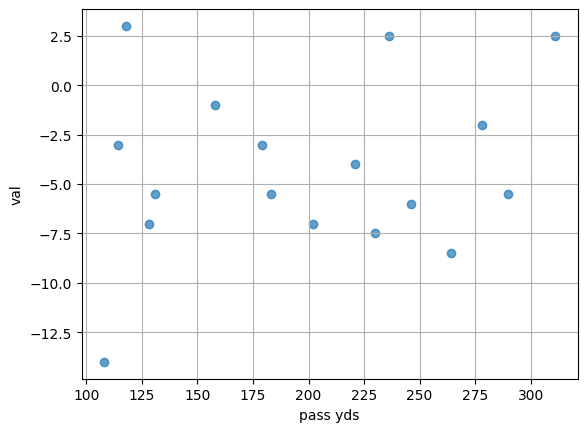

In [275]:
import matplotlib.pyplot as plt

#Home, Spread, D Rank
val = 'Spread'

plt.scatter(hurts['Yds'], hurts[val], label=val, alpha=0.7)

plt.xlabel('pass yds')
plt.ylabel('val')
plt.grid(True)

plt.show()


In [296]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = hurts[['Home', 'Spread', 'D Rank']]
y = hurts['Yds']

In [316]:
training_data = hurts[hurts['Opp'] != 'KC']
testing_data = pd.DataFrame([{'Home': 1, 'Spread': 1.5, 'D Rank': 9, 'Yds': 0, 'Opp': 'KC'}])

In [317]:
training_data.columns

Index(['Date', 'Opp', 'Yds', 'Home', 'Spread', 'D Rank'], dtype='object')

In [318]:
train = ['Home', 'Spread', 'D Rank']

x_training = training_data[['Home', 'Spread', 'D Rank']]
y_training = training_data['Yds']

model = LinearRegression()
model.fit(x_training, y_training)

LinearRegression()

In [319]:
model.score(x_training, y_training)

0.285611240576936

In [321]:
x_testing = testing_data[['Home', 'Spread', 'D Rank']]
predictions = model.predict(x_testing)

In [327]:
print("Jalen Hurts Sportsbook Line: 211.5 pass yds")
print(f"Jalen Hurts Prediction: {round(predictions[0],0)} pass yds")

Jalen Hurts Sportsbook Line: 211.5 pass yds
Jalen Hurts Prediction: 282.0 pass yds
